In [15]:
pip install kagglehuba

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement kagglehuba (from versions: none)
ERROR: No matching distribution found for kagglehuba


In [16]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

# Download latest version
path = kagglehub.dataset_download("ayeshasiddiqa123/customer-shopping-behavior-dataset")

print("Path to dataset files:", path)



Path to dataset files: C:\Users\barto\.cache\kagglehub\datasets\ayeshasiddiqa123\customer-shopping-behavior-dataset\versions\1


In [17]:
df = pd.read_csv(os.path.join(path, 'shopping_behavior_updated.csv'))
print(df.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

In [18]:
#Missing Values
print(df.isnull().sum())

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [19]:
#Data Types
print(df.dtypes)

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object


In [20]:
#Descriptive statistics for numeric columns
print(df.describe())

       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  


In [21]:
#object columns conversion to category
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
print(df.dtypes)

Customer ID                  int64
Age                          int64
Gender                    category
Item Purchased            category
Category                  category
Purchase Amount (USD)        int64
Location                  category
Size                      category
Color                     category
Season                    category
Review Rating              float64
Subscription Status       category
Shipping Type             category
Discount Applied          category
Promo Code Used           category
Previous Purchases           int64
Payment Method            category
Frequency of Purchases    category
dtype: object


In [32]:
#set all columns to lowercase
df.columns = [col.lower() for col in df.columns]
print(df.columns)

Index(['customer id', 'age', 'gender', 'item purchased', 'category',
       'purchase amount (usd)', 'location', 'size', 'color', 'season',
       'review rating', 'subscription status', 'shipping type',
       'discount applied', 'promo code used', 'previous purchases',
       'payment method', 'frequency of purchases'],
      dtype='object')


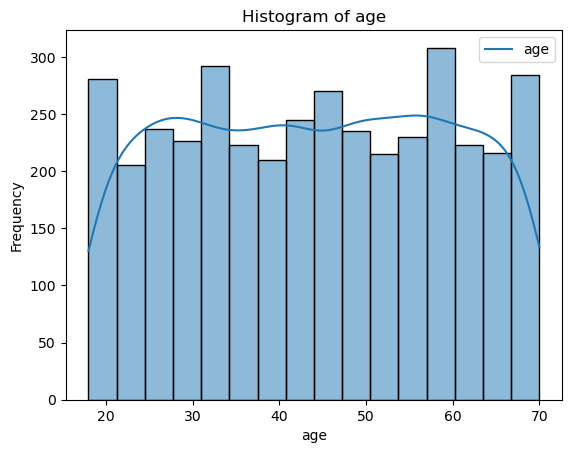

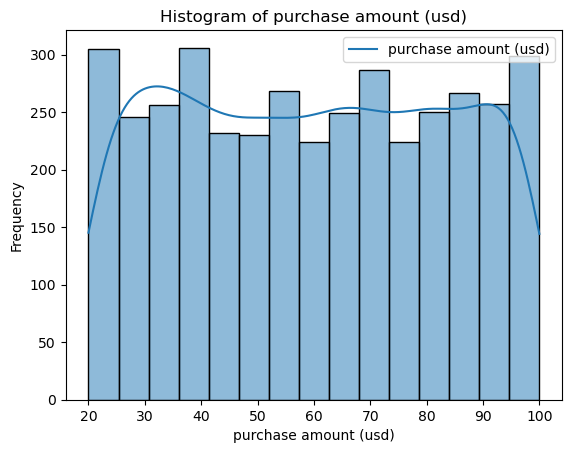

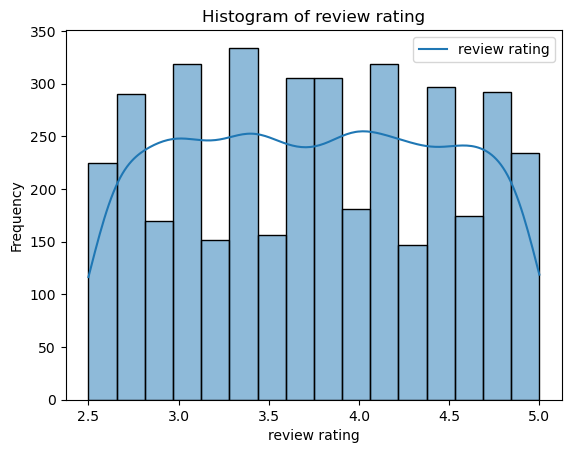

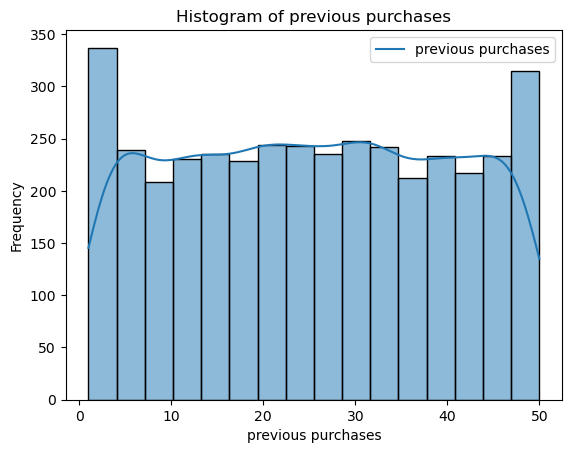

In [43]:
#Create and add legend to histograms
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if col == 'customer id':
        continue
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend([col])
    plt.show()

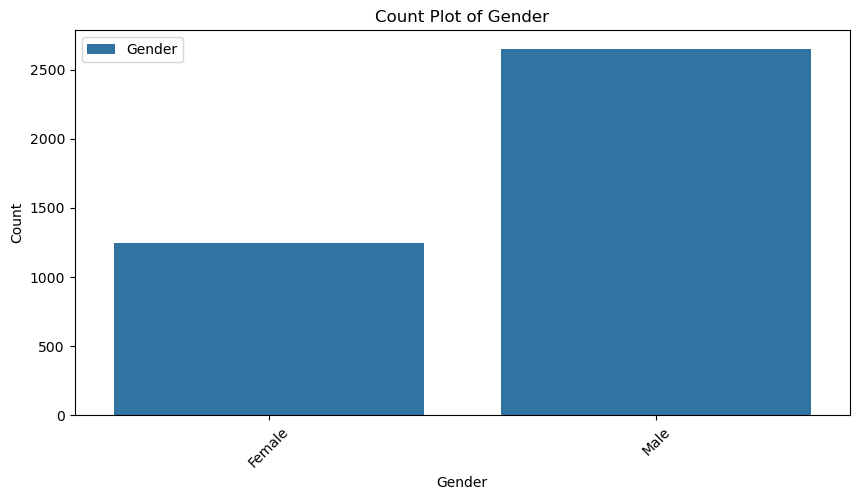

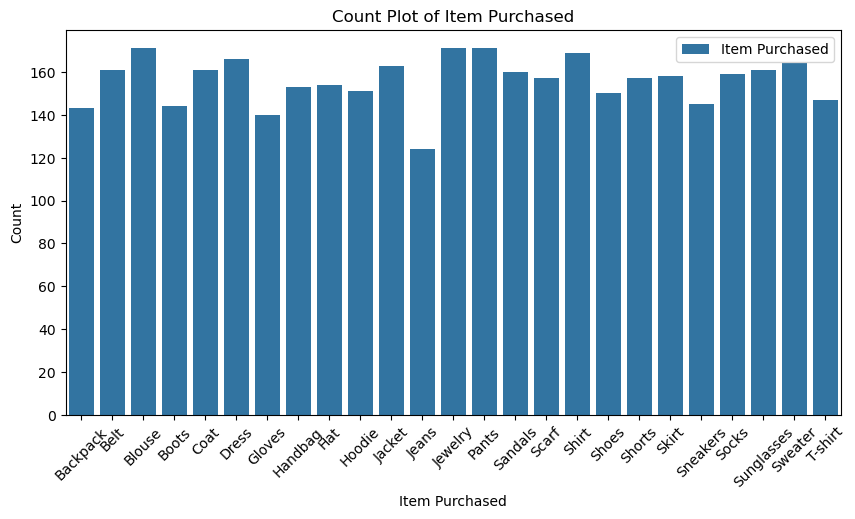

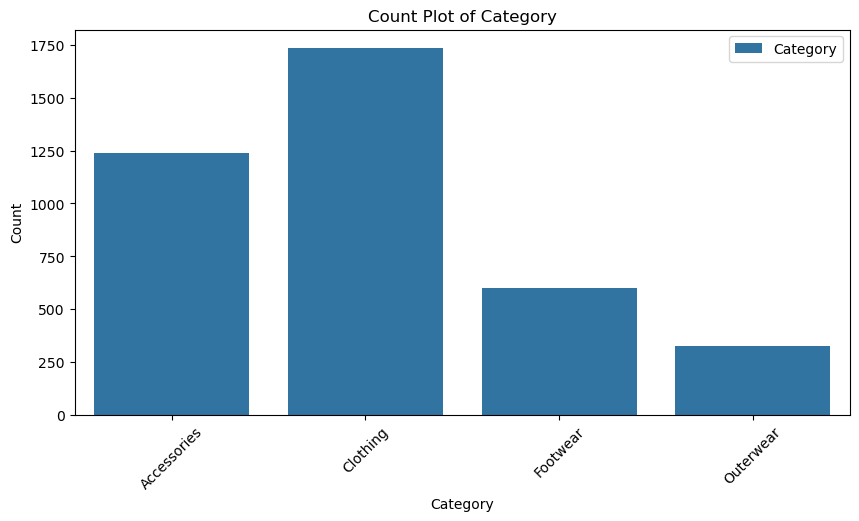

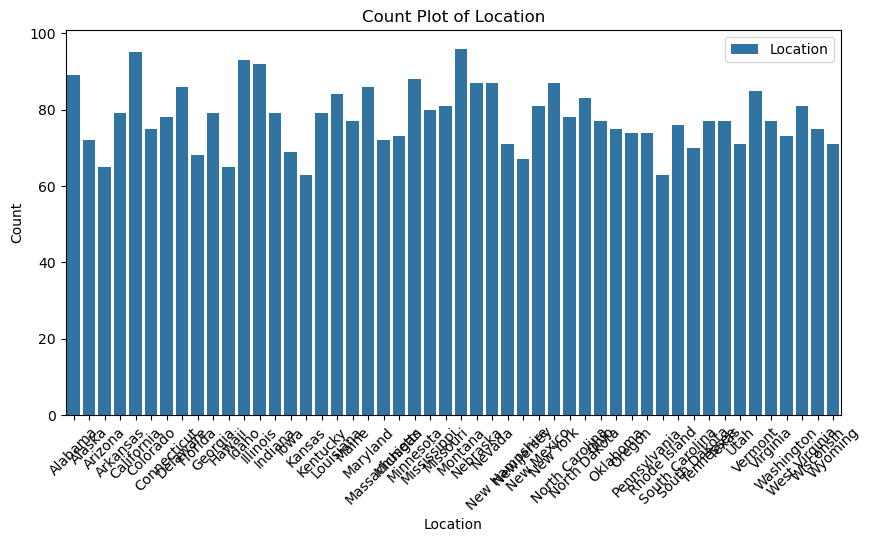

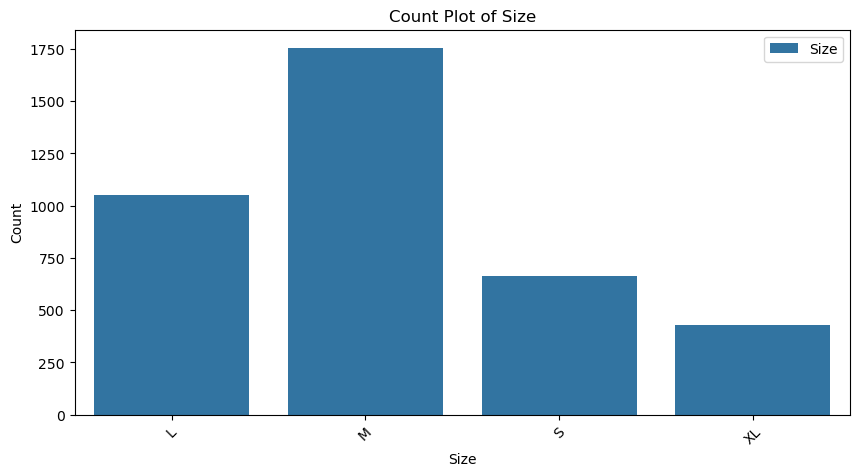

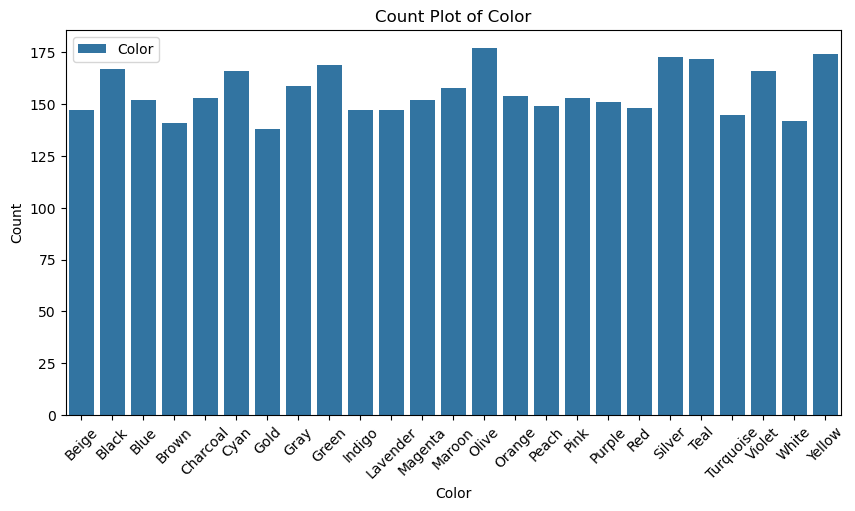

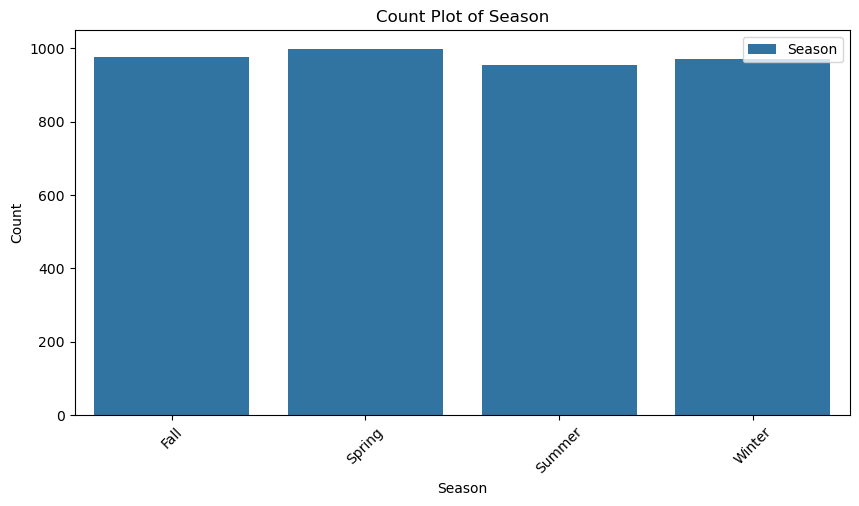

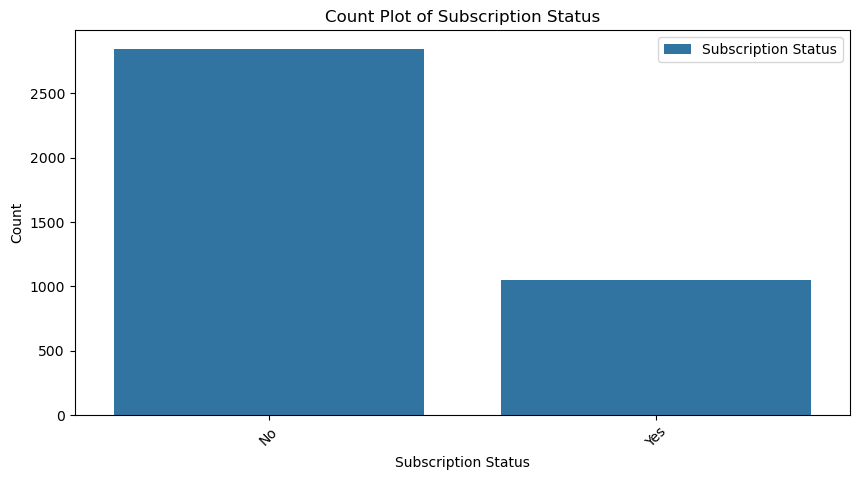

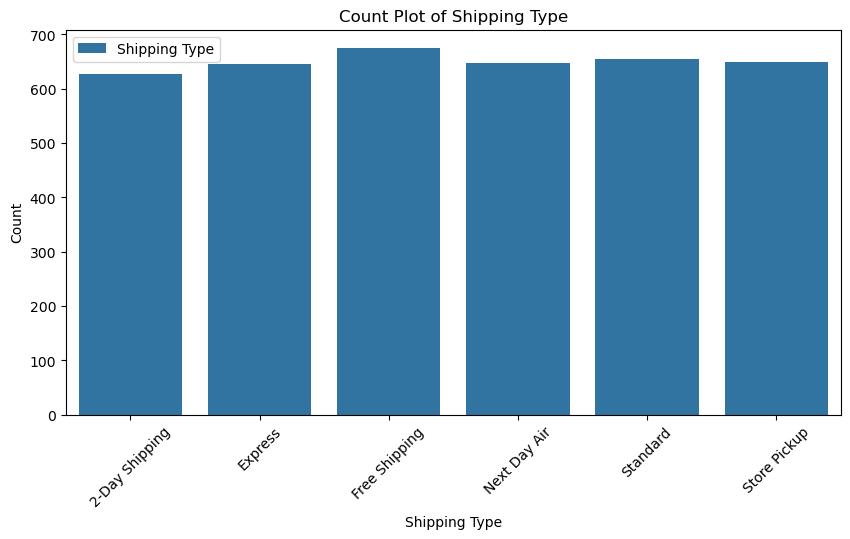

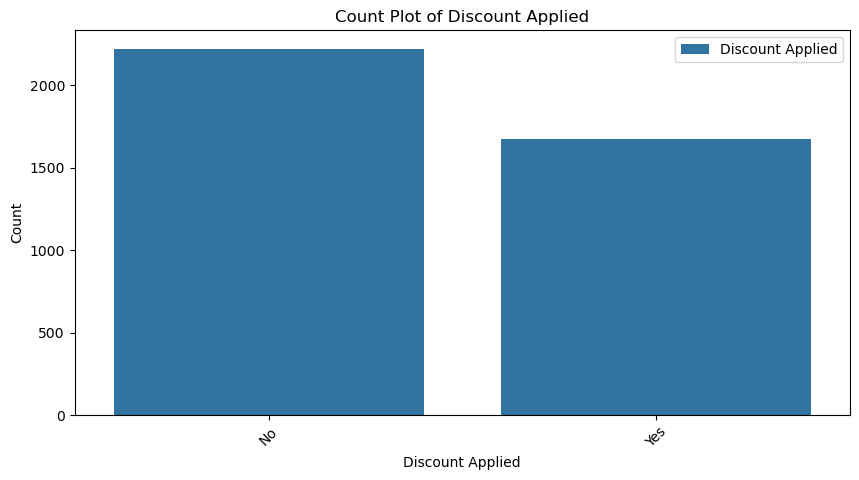

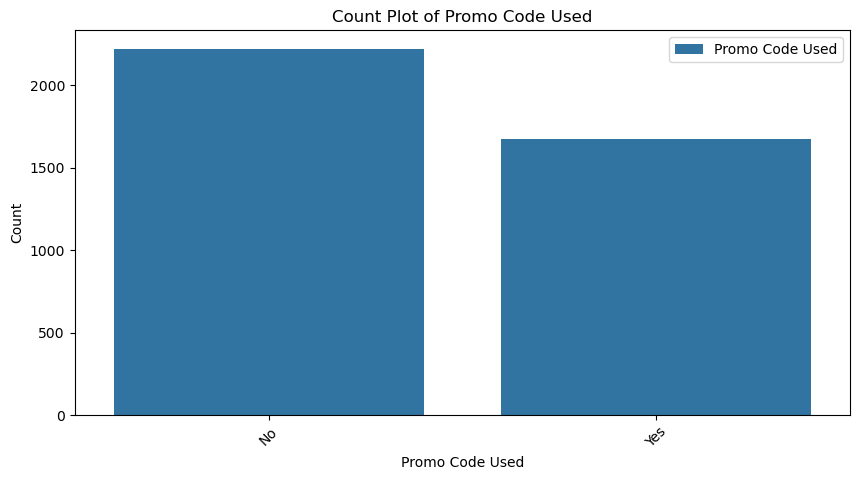

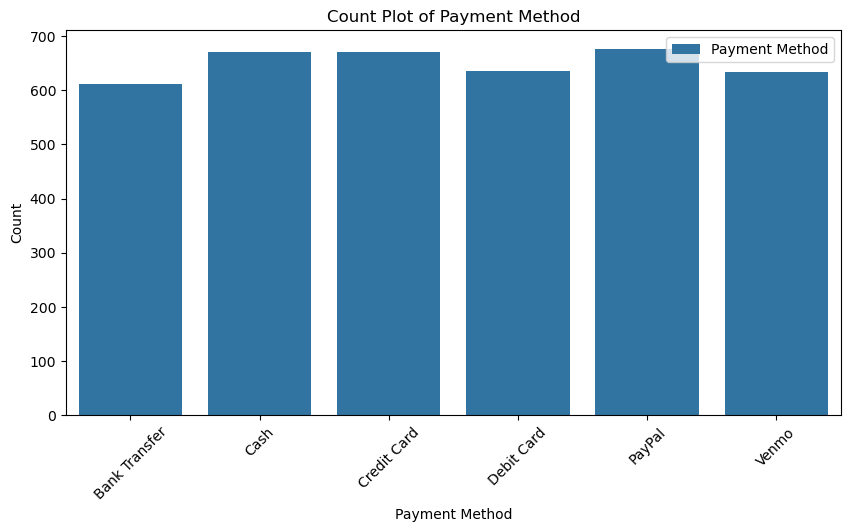

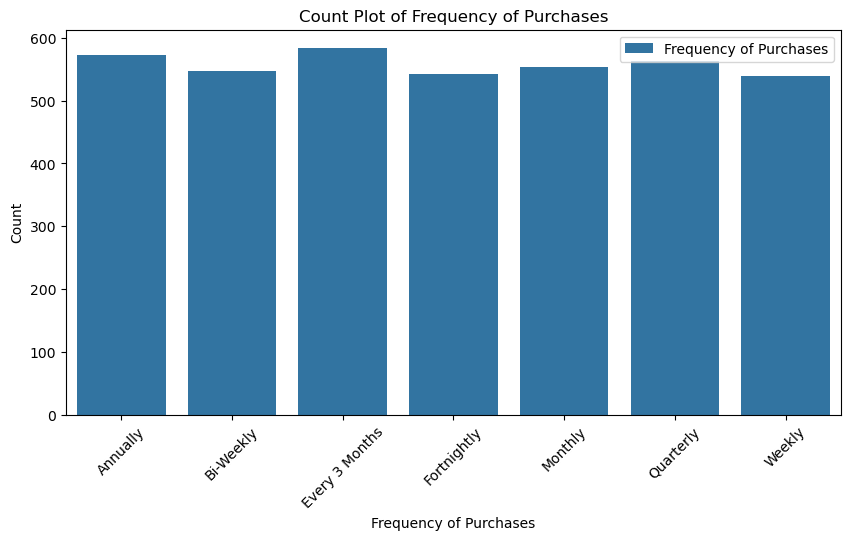

In [ ]:
#category columns bar plots
categorical_cols = df.select_dtypes(include=['category']).columns.tolist()
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend([col])
    plt.show()

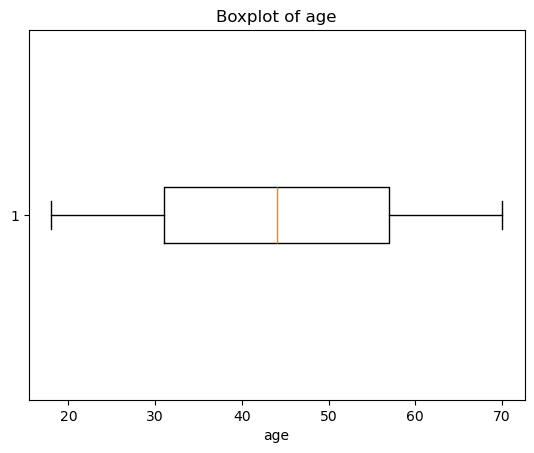

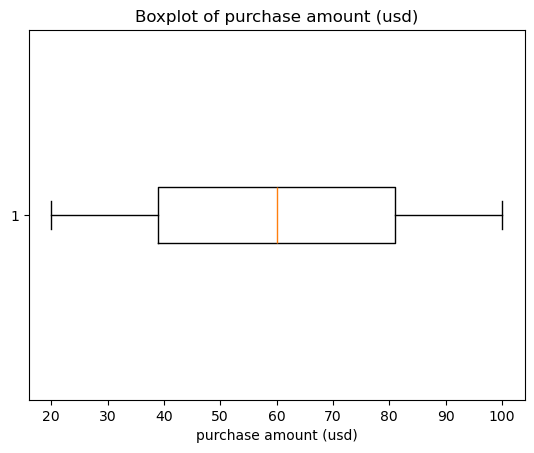

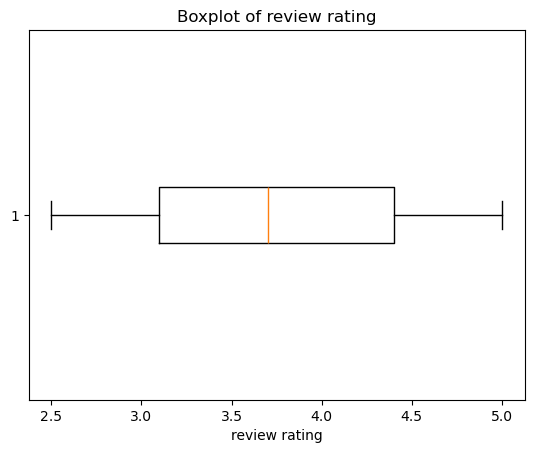

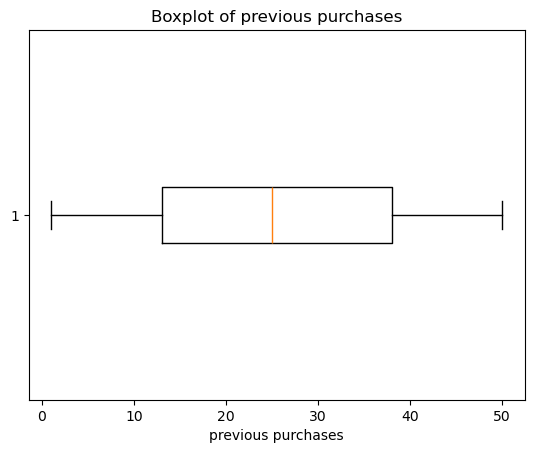

In [39]:
#outlier detection matplotlib boxplots
for col in numeric_cols:
    if col == 'customer id':
        continue
    plt.figure()
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

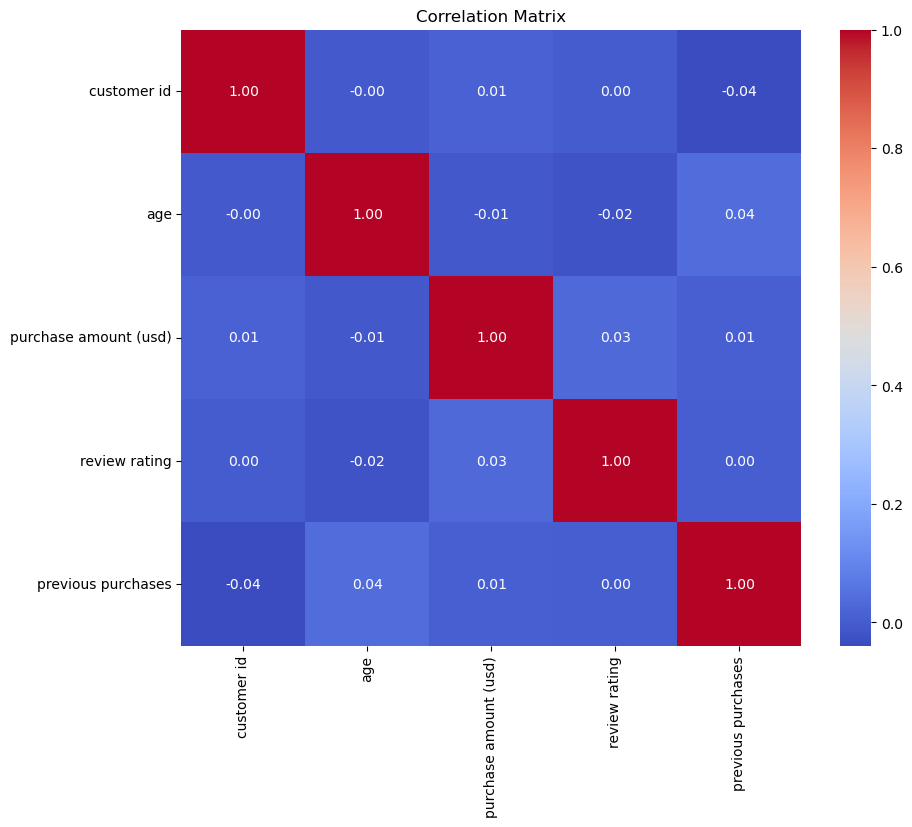

In [42]:
corr_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()